In [3]:
%matplotlib inline

/tmp/ipykernel_700346/2457951346.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis_r')


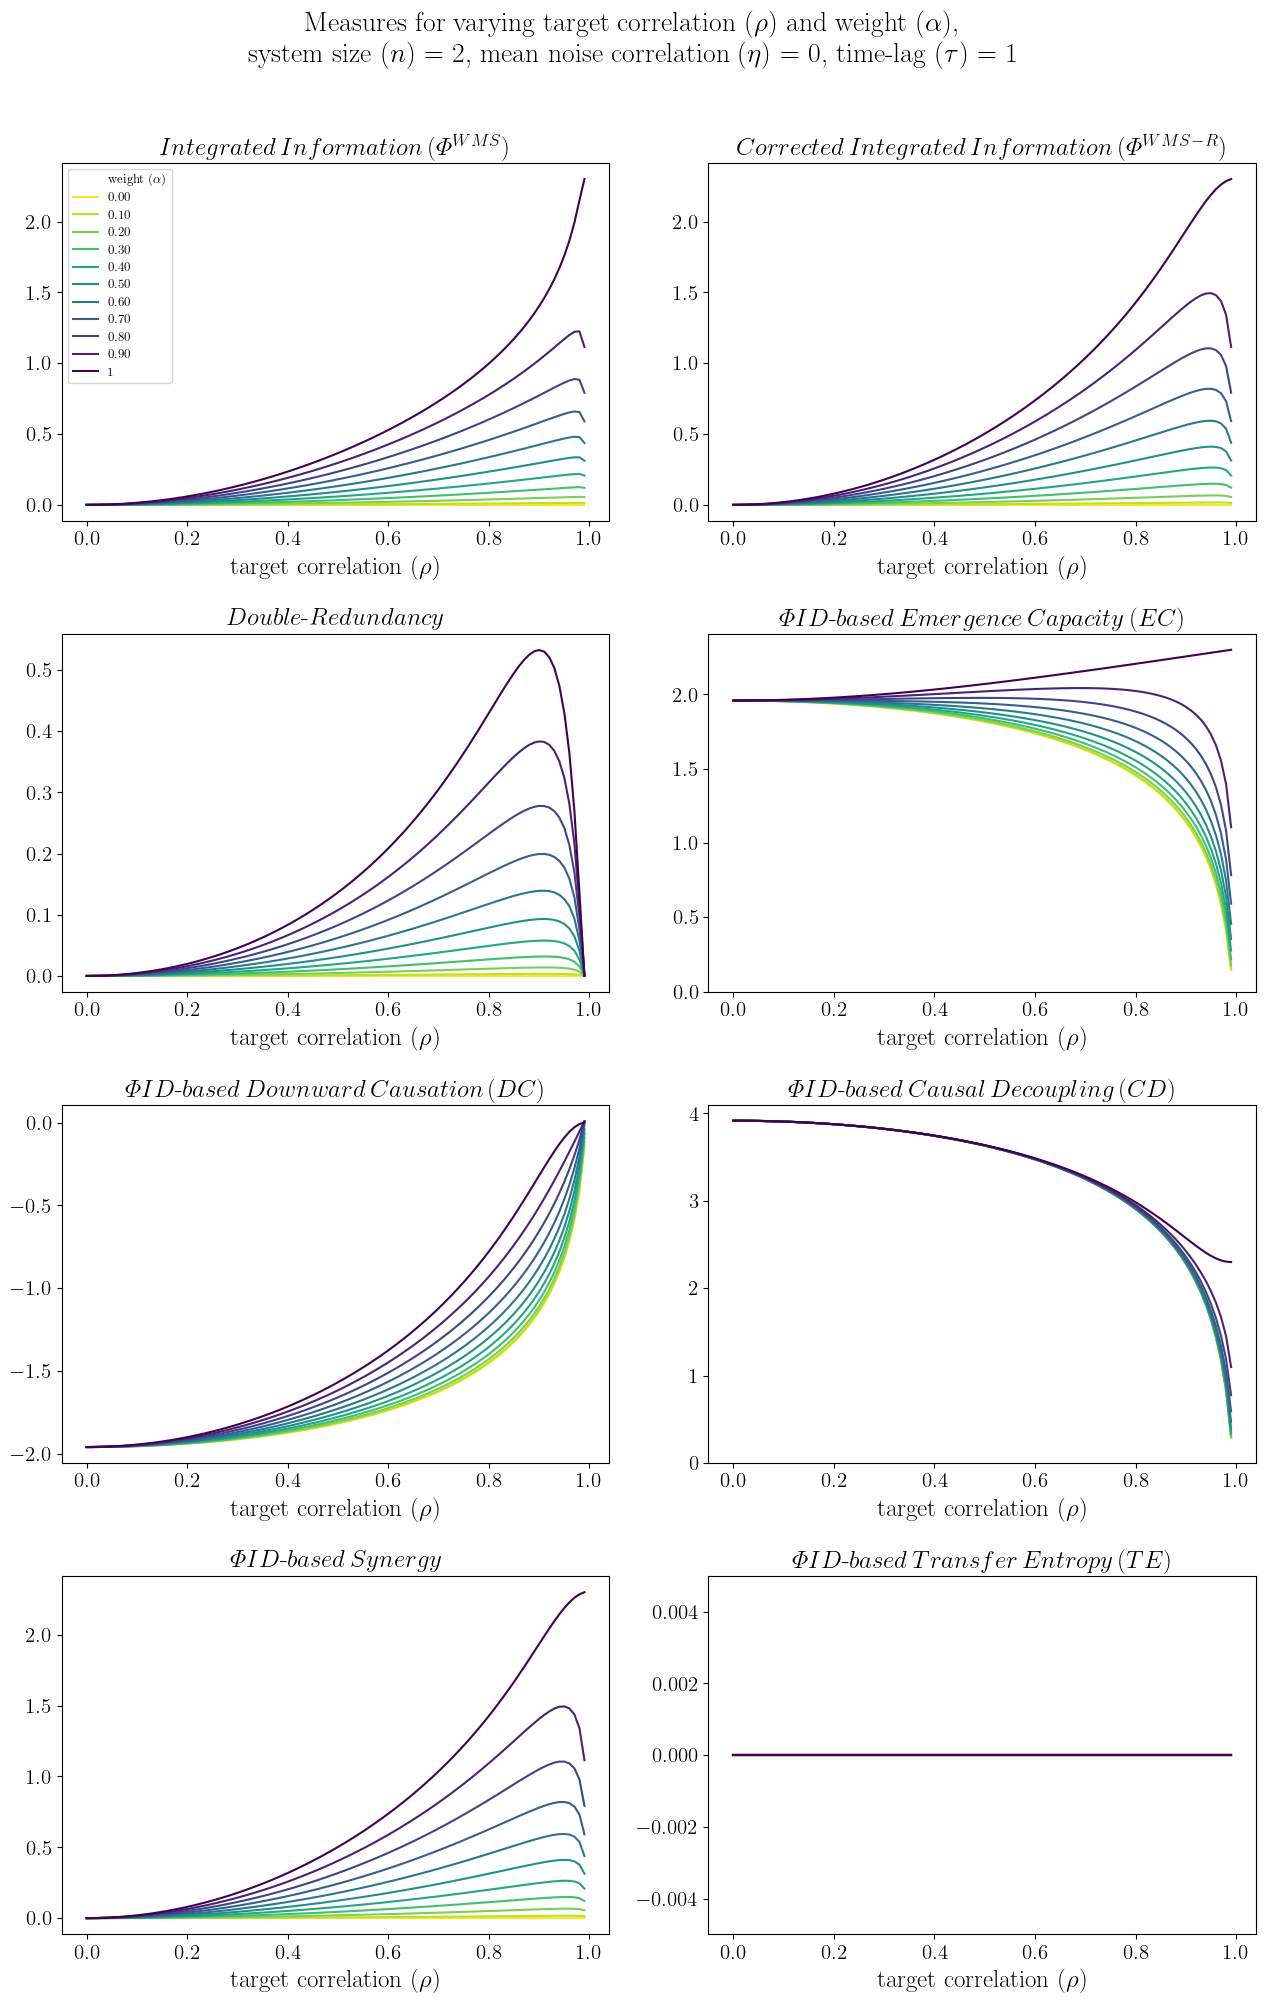

/tmp/ipykernel_700346/2457951346.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis_r')


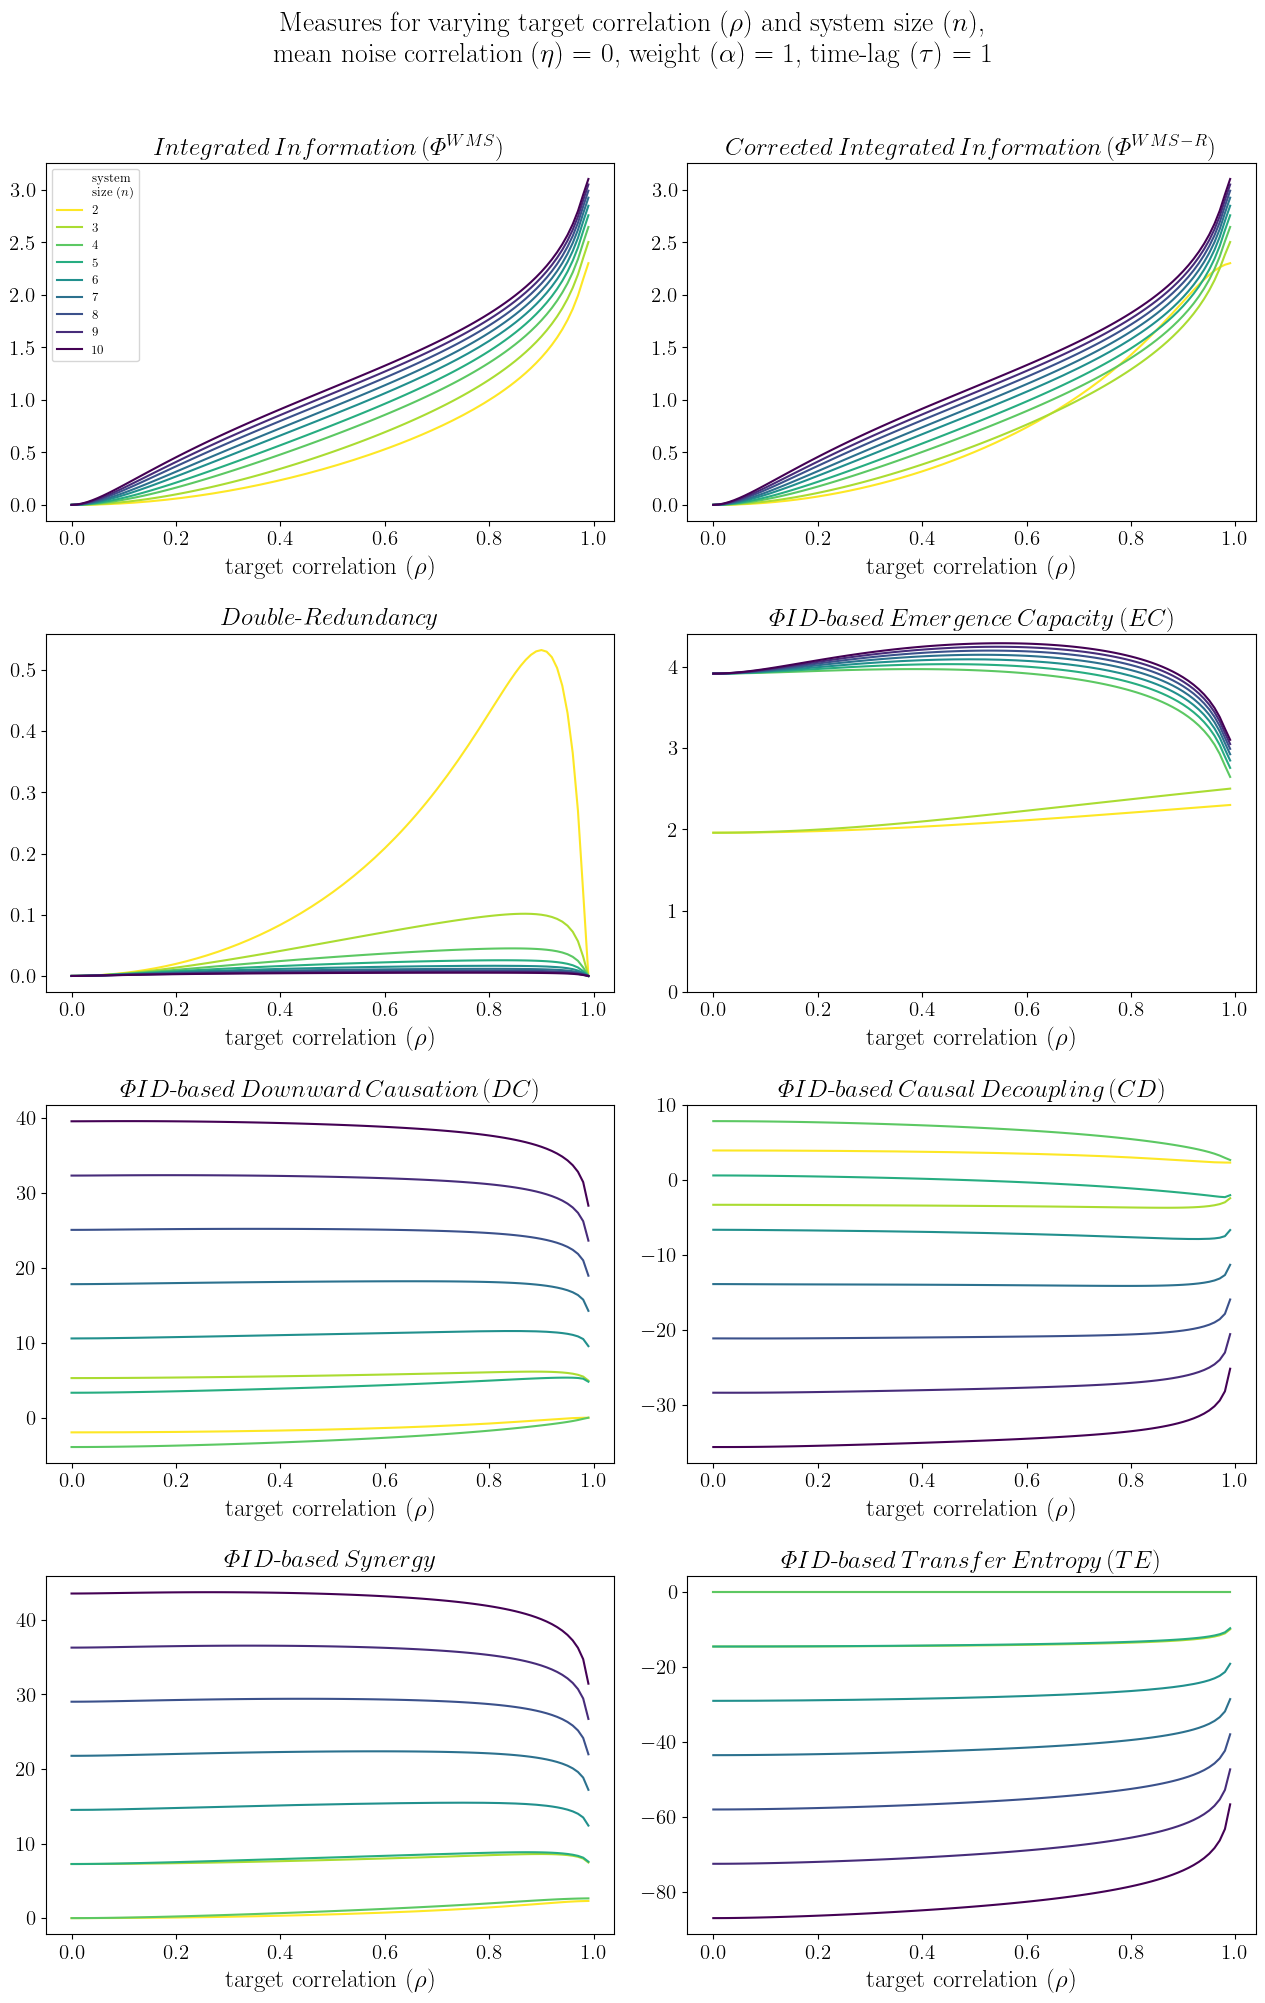

/tmp/ipykernel_700346/2457951346.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis_r')


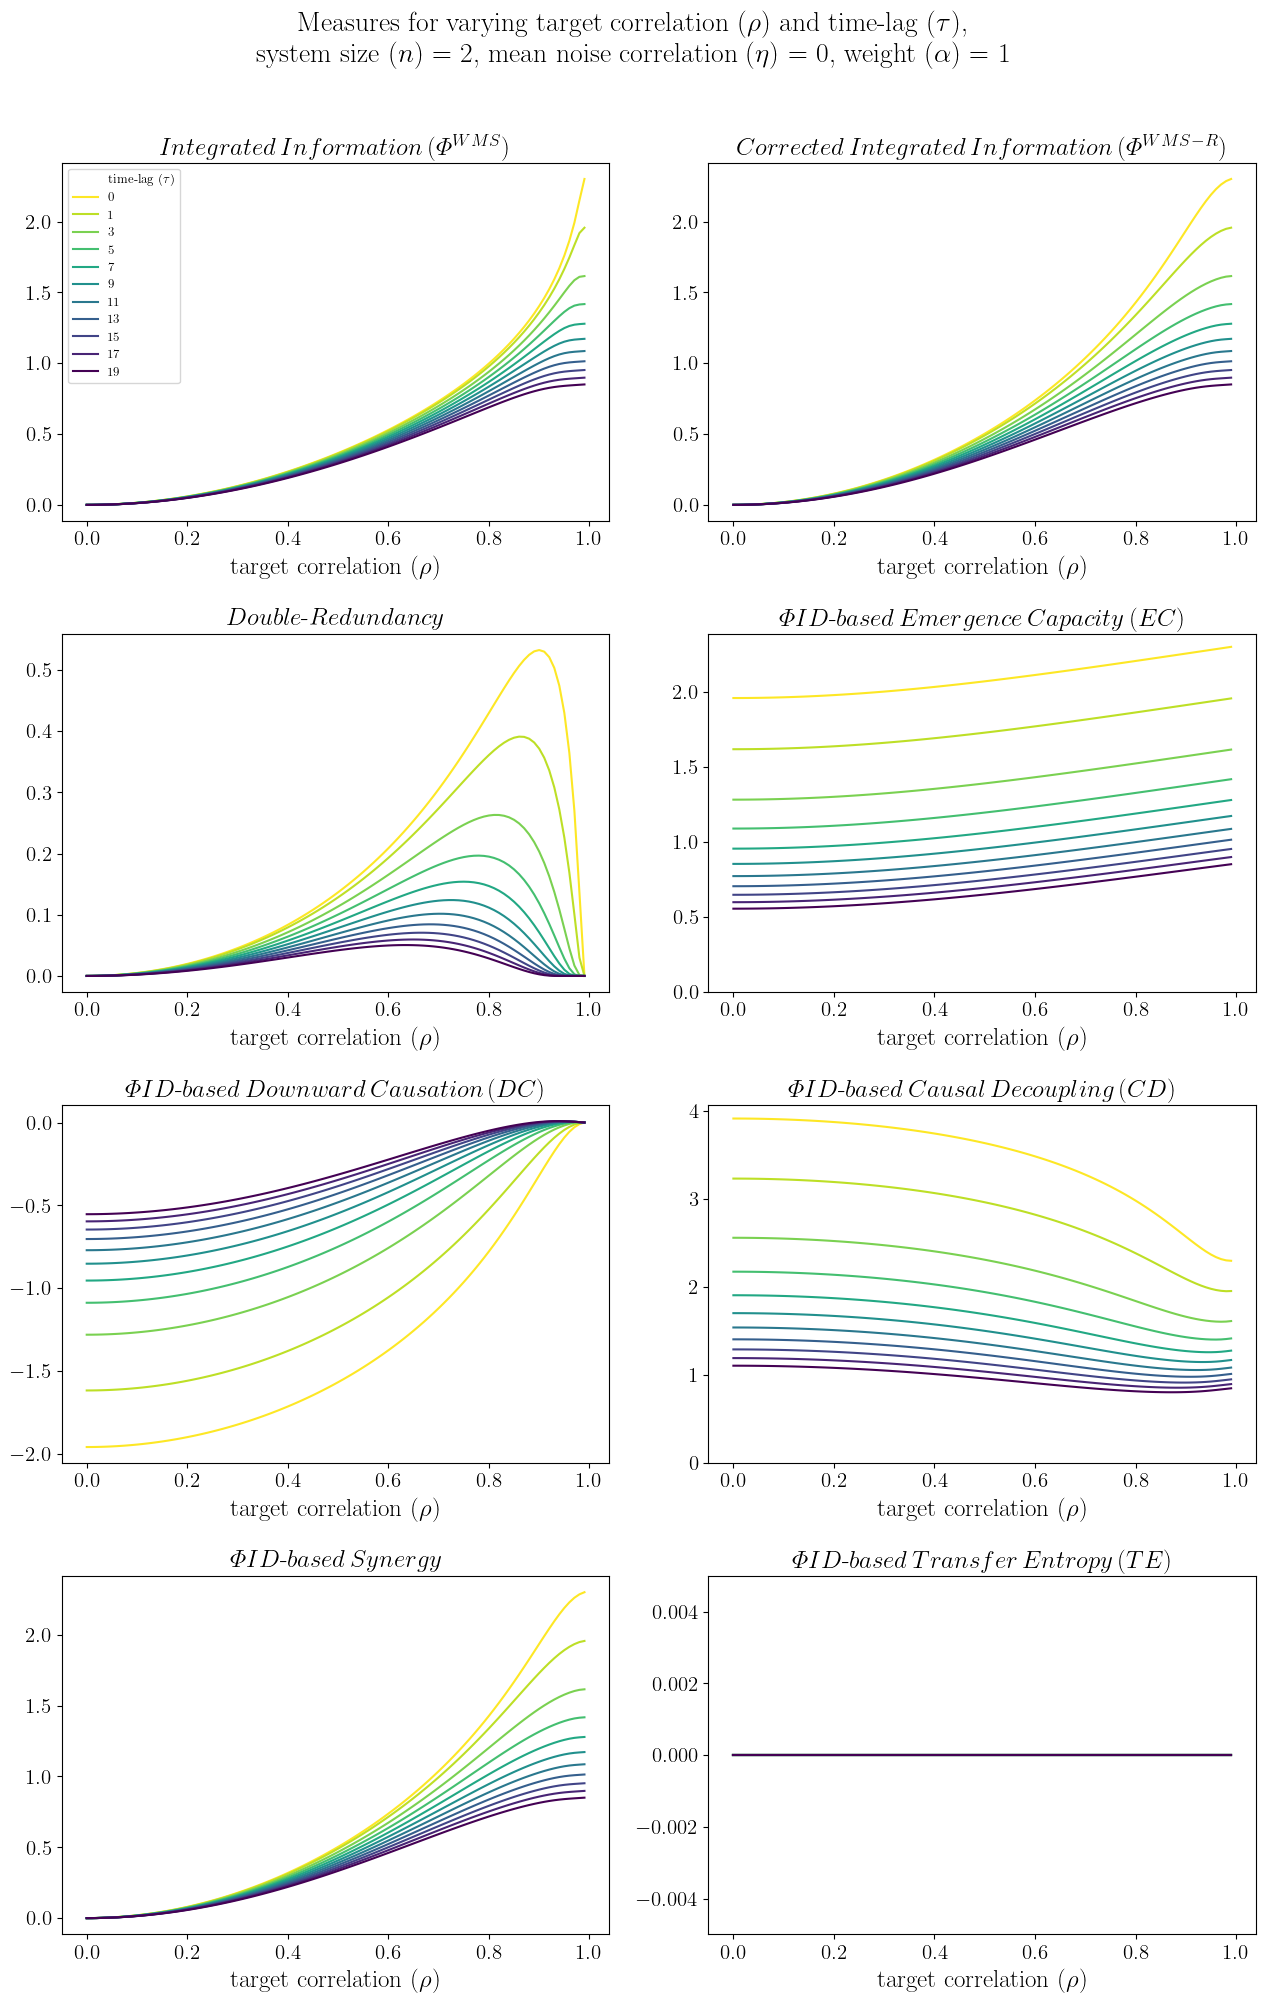

/tmp/ipykernel_700346/2457951346.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis_r')


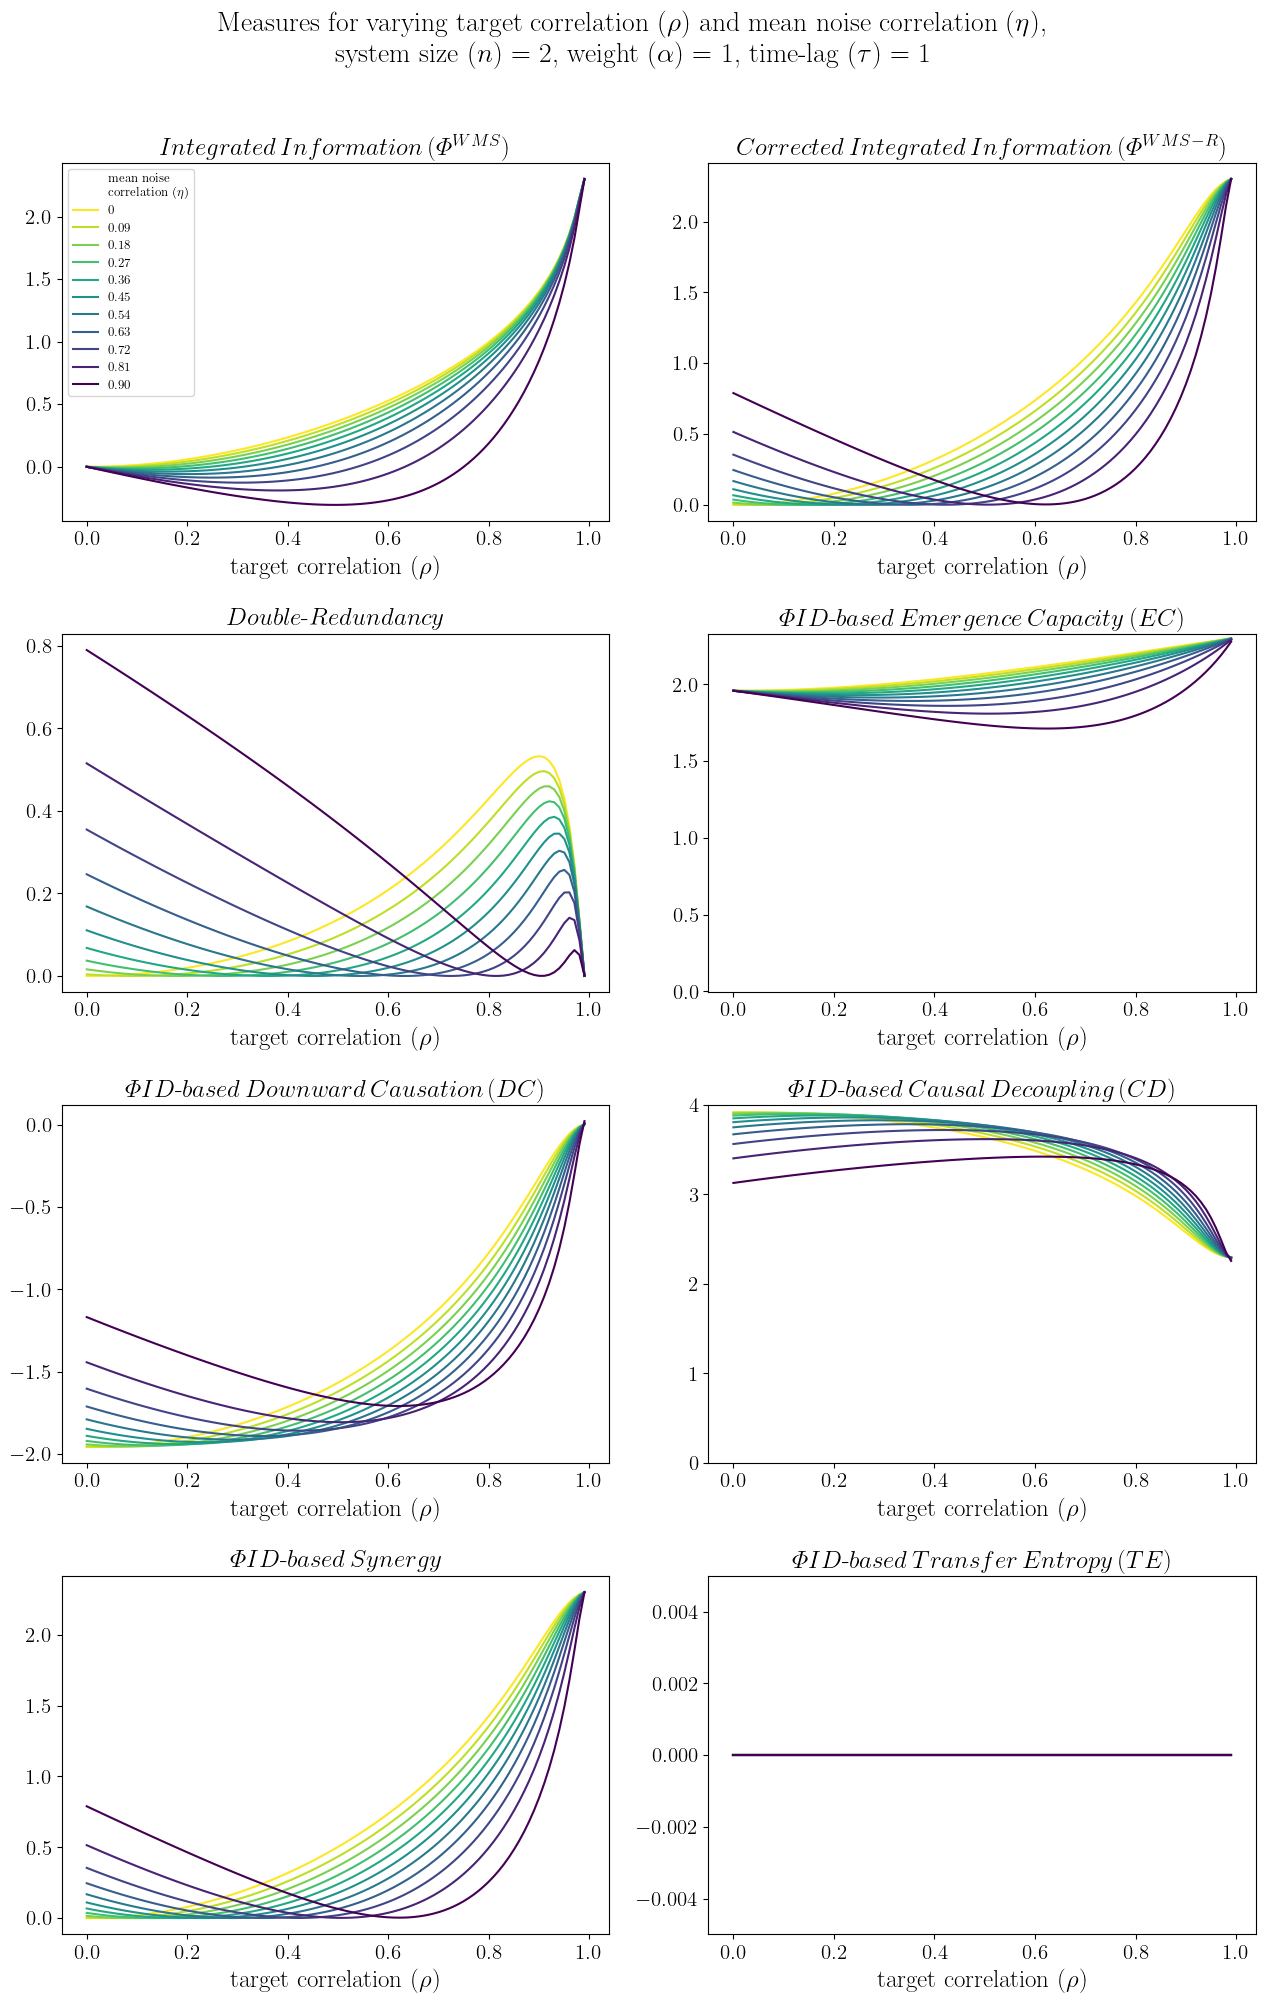

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import os
import joblib
import math

""" # parameter name mapping
param_names = {
    'correlation' : 'target correlation',
    'n_var': 'system size$',
    'mean_noise_corr': 'mean noise correlation',
    'time_lag': 'time-lag',
    'weight': 'weight'
} """

# parameter name mapping
param_names = {
    'correlation' : r'target correlation $(\rho)$',
    'n_var': r'system size $(n)$',
    'mean_noise_corr': r'mean noise correlation $(\eta)$',
    'time_lag': r'time-lag $(\tau)$',
    'weight': r'weight $(\alpha)$'
}

def plot_all_param_pairs(base_path, plot_config, param_names, filename_extension, legend_axis_nr: int = 2):
    data_files = {
        ('correlation', 'weight'): 'results_mec_var_inf_corr_weight',
        ('correlation', 'n_var'): 'results_mec_var_inf_corr_system_size',
        ('correlation', 'time_lag'): 'results_mec_var_inf_corr_time_lag',
        ('correlation', 'mean_noise_corr'): 'results_mec_var_inf_corr_mean_noise_corr'
    }
    
    plt.rc('text', usetex=True)
    plt.rc('font', size=18, family='serif', serif=['latin modern roman'])
    plt.rc('legend', fontsize=14)
    plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
    
    for (param1, param2), filename in data_files.items():
        df = joblib.load(os.path.join(base_path, 'analyses', filename + '.pkl'))
        
        n_cols = 2
        n_rows = math.ceil(len(plot_config) / n_cols)
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(13,5*n_rows))
        axes = axes.flatten()  
        legend_handles = []
        unique_param2_values = df[param2].unique()
        cmap = cm.get_cmap('viridis_r')
        colors = [cmap(i / (len(unique_param2_values) - 1)) 
                 for i in range(len(unique_param2_values))]
        
        param1_name = param_names.get(param1, param1)
        for i, (ax, (quantity, title)) in enumerate(zip(axes, plot_config.items())):
            if len(plot_config) % 2 != 0 and i == len(plot_config)-1:
                ax.set_visible(True)
                ax.remove()
                axes[-1].set_visible(True)
                axes[-1].remove()
                gs = fig.add_gridspec(n_rows, 4)
                ax = fig.add_subplot(gs[n_rows-1, 1:3])
            for (param2_val, group), color in zip(df.groupby(param2), colors):
                param2_name = param_names.get(param2, param2)
                # format as integer if the value is whole number
                param2_val_str = str(int(param2_val)) if float(param2_val).is_integer() else f"{param2_val:.2f}"
                label = f"{param2_val_str}" if i == legend_axis_nr else None
                line, = ax.plot(group[param1], group[quantity], "-", color=color, label=label)
                if i == legend_axis_nr:
                    legend_handles.append(line)
            ymin, ymax = ax.get_ylim()
            if ymax > 0:
                ax.set_ylim(min(ymin, -0.005), max(ymax, 0.005))

            ax.set_xlabel(param1_name, fontsize=18)
            ax.tick_params(axis='both', labelsize=15)
            ax.set_title(title, fontsize=18)

        fixed_params = {param: df[param].iloc[0] for param in 
                       ['correlation', 'n_var', 'mean_noise_corr', 'weight', 'time_lag']
                       if param not in [param1, param2]}
        
        fixed_params_str = ", ".join(
            f"{param_names[param]} = {str(int(value)) if float(value).is_integer() else f'{value:.2f}'}" 
            for param, value in fixed_params.items()
        )
        fig.subplots_adjust(hspace=0.3)
        fig.suptitle(f"Measures for varying {param1_name} and {param_names[param2]}, \n {fixed_params_str}", fontsize=20, y=1.005) 
        
        if param2_name == "mean noise correlation $(\eta)$":
            param2_name_display = "mean noise\ncorrelation $(\eta)$"
        elif param2_name == "system size $(n)$":
            param2_name_display = "system\nsize $(n)$"
        else:
            param2_name_display = param2_name
    
        legend_handles = [mpatches.Patch(color='none', label=f'{param2_name_display}')] + legend_handles
        
        # Replace the existing legend creation with this conditional code that handles the 'mean_noise_corr' case specially
        if param2 == 'mean_noise_corr' and plot_config == plot_config2:
            # Place legend in subplot at index 1 (upper right subplot) with 'lower left' position
            axes[1].legend(handles=legend_handles, fontsize=9, title_fontsize=9, markerscale=0.7,
                        frameon=True, loc='lower left')
        else:
            # Keep the original legend behavior for all other plots
            axes[legend_axis_nr].legend(handles=legend_handles, fontsize=9, title_fontsize=9, markerscale=0.7,
                        frameon=True)

        fig.tight_layout()
        plt.show()
        
        output_filename = 'mec_var_inf_' + filename_extension + {
            ('correlation', 'weight'): 'corr_weight',
            ('correlation', 'n_var'): 'corr_system_size',
            ('correlation', 'time_lag'): 'corr_time_lag',
            ('correlation', 'mean_noise_corr'): 'corr_mean_noise_corr'
        }[(param1, param2)]
        
        for ext in ['.pdf', '.png']:
            fig.savefig(os.path.join(base_path, 'plots', output_filename + ext),
                       bbox_inches='tight')
        plt.close(fig)

plot_config1 = {
    'phi': r'$Integrated\,Information\,(\varPhi^{WMS})$',
    'phi_corrected': r'$Corrected\,Integrated\,Information\,(\varPhi^{WMS-R})$',
    'double_red_mmi': r'$Double\text{-}Redundancy$', 
    'emergence_capacity_phiid': r'$\varPhi ID\text{-}based\,Emergence\,Capacity\,(EC)$',
    'downward_causation_phiid': r'$\varPhi ID\text{-}based\,Downward\,Causation\,(DC)$',
    'sts': r'$\varPhi ID\text{-}based\,Causal\,Decoupling\,(CD)$',
    'synergy_phiid': r'$\varPhi ID\text{-}based\,Synergy$',
    'transfer_phiid': r'$\varPhi ID\text{-}based\,Transfer\,Entropy\,(TE)$',
}

plot_config2 = {  
    'mi_PAST_PRESENT_FULL': r'$MI\,Past\text{-}Present\,Whole\,System\,(I(\boldsymbol{X}_t, \boldsymbol{X}_{t-\tau}))$',
    'mi_PAST_PRESENT_PART1': r'$MI\,Past\text{-}Present\,Part\,One\,(I(x^1_t, x^1_{t-\tau}))$',
    'mi_PAST_PRESENT_PART2': r'$MI\,Past\text{-}Present\,Part\,Two\,(I(x^2_t, x^2_{t-\tau}))$',
    'mi_SAME_TIME_FULL': r'$Same\text{-}Time\,MI\,(I(x^1_t; x^2_t))$',
    'entropy_PRESENT_FULL': r'$Same\text{-}Time\,Entropy\,(H(\boldsymbol{X}_t))$',
    'entropy_PRESENT_PART1': r'$Same\text{-}Time\,Entropy\,Part\,One\,(H(x^1_t))$',
    'entropy_PRESENT_PART2': r'$Same\text{-}Time\,Entropy\,Part\,Two\,(H(x^2_t))$',  
}

# base_path = '../results/'
base_path = '/media/nadinespy/NewVolume1/work/phd/projects/mec_var_inf/mec_var_inf/results'
# choose 'measures_' for plot_config1, and 'mi_entropies_' for plot_config2
filename_extension = 'measures_'

# use legend_axis_nr = 0 for plot_config1
# use legend_axis_nr = 3 for plot_config2
plot_all_param_pairs(base_path, plot_config1, param_names, filename_extension, legend_axis_nr=0)